<a href="https://colab.research.google.com/github/dcrisrodriguez/academic/blob/main/Clasificadores_FraudeCanastas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import zipfile
import pandas as pd
import os

# **Fraude Canastas**


## Modulo 1 - examen práctico
* David Rodriguez
* Arturo Rodriguez

## Paso 1. Exploramos el dataset

### **Lectura de datos**

Damos acceso al drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Establecemos la ruta al dataset

In [ ]:
# Buscamos el archivo en el drive de alguno de los integrantes del equipo
zip_file_path="/content/drive/MyDrive/Colab Notebooks/bourbaki/FraudeCanastasModulo1/FraudeCanastas.zip"
csv_file_name="FraudeCanastas.csv"
if not os.path.exists(zip_file_path):
  zip_file_path="/content/drive/MyDrive/Bourbaki/Fraude Canastas Semana 4/FraudeCanastas.zip"
  csv_file_name="FraudeCanastas.csv"

NameError: name 'os' is not defined

In [ ]:
# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file content
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file)

### **Exploración del dataset**

In [ ]:
# Explorando el dataset
print(f"Features {df.shape[1]} y registros {df.shape[0]}")


Features 2457 y registros 9319


In [ ]:
# Tipos de datos por columna
df.dtypes

,0
ID,int64
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64
...,...
costo_total,int64
costo_medio_item,float64
costo_item_max,int64
costo_item_min,float64


In [ ]:
#información general
df.info()
# Solamente una columna es tipo int, el resto es tipo float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Columns: 2457 entries, ID to fraud_flag
dtypes: float64(2452), int64(5)
memory usage: 174.7 MB


In [ ]:
# Primeros cinco registros
# La primer columna parece ser un id
df.head()

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0


In [ ]:
# Obtenemos una descripción del dataset
# vemos que las características se encuentran en rangos que varian entre ellas
df.describe()

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
count,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,...,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000,9319.000000
mean,58763.568409,0.107308,0.002146,0.305290,0.207533,0.050971,0.014916,0.292521,0.230175,0.353471,...,0.003005,0.001932,0.002790,1.774761,1.856852,1337.801052,898.376189,1184.433416,647.735165,0.141539
std,33714.628042,10.358941,0.207179,7.606907,6.133545,2.843956,1.439893,6.848110,6.695964,13.926653,...,0.290050,0.186461,0.269332,1.541868,1.922323,1070.597321,734.425487,786.942018,841.194373,0.348595
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,219.000000,41.615385,130.000000,0.000000,0.000000
25%,29529.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,838.000000,445.500000,749.000000,7.000000,0.000000
50%,58489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1124.000000,745.400000,1049.000000,379.000000,0.000000
75%,88902.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,1612.000000,1150.000000,1415.500000,1099.000000,0.000000
max,115942.000000,1000.000000,20.000000,500.000000,436.000000,168.000000,139.000000,169.000000,195.000000,549.000000,...,28.000000,18.000000,26.000000,38.000000,44.000000,24551.000000,19999.000000,19999.000000,19999.000000,1.000000


La columna ID de acuerdo a la documentación es un dentificador único

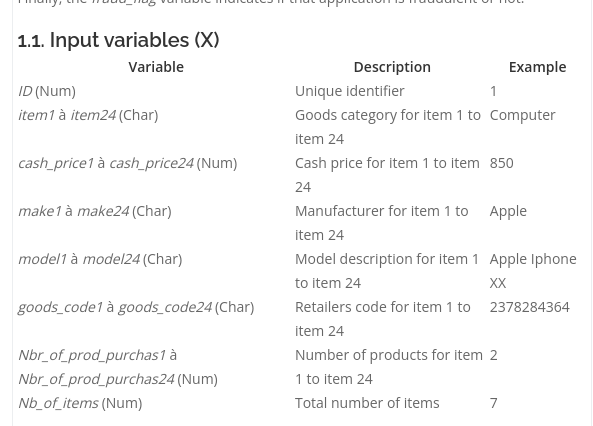

In [ ]:
# Explorando la columna ID para comprobar si es un feature o un ID
print(f"IDs unicos {len(df['ID'].unique())}")

# Como la columna ID tiene el mismo numero de valores únicos que filas, entonces
# la descartamos como feature
print(len(df["ID"].unique()) == df.shape[0])

# Quitamos la columna ID
df = df.drop(columns=['ID'])

IDs unicos 9319
True


In [ ]:
# Cuantos registros tenemos para cada clase?
df["fraud_flag"].value_counts()
# El dataset se encuentra desbalanceado puesto que hay un mayor número de casos
# no fraude con respecto a los casos de fraude

,count
fraud_flag,
0.0,8000
1.0,1319


In [ ]:
# Contar el número de valores NaN o nulos en cada columna
nan_counts = df.isnull().sum()

# Mostrar el número de NaN por columna
print(nan_counts)
print("Columnas con valores nulos")
print(nan_counts[nan_counts>0])

# Vemos que el dataset no tiene valores faltantes

APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90                                       0
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H    0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE                  0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI     0
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE         0
                                                                                  ..
costo_total                                                                        0
costo_medio_item                                                                   0
costo_item_max                                                                     0
costo_item_min                                                                     0
fraud_flag                                                                         0
Length: 2456, dtype: int64
Columnas con valores nulos
Series([], 

In [ ]:
# Ver si tenemos filas duplicadas
print(df.duplicated())
print(f"Total de filas duplicadas {df.duplicated().sum()}")
print(f"Registros únicos {df.drop_duplicates().shape}")

0       False
1       False
2       False
3       False
4       False
        ...  
9314     True
9315    False
9316     True
9317     True
9318     True
Length: 9319, dtype: bool
Total de filas duplicadas 5233
Registros únicos (4086, 2456)


In [ ]:
df.iloc[:,:24]

,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX NOISE CANCELLING WIRELESS BLUETO,...,AUDIO ACCESSORIES | APPLE | RETAILER,AUDIO ACCESSORIES | BEATS | BEATS STUDIO BUDS TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | BEATS | POWERBEATS PRO TRUE WIRELESS BLUETOOTH IN-EAR SPOR,AUDIO ACCESSORIES | BEATS | SOLO3,AUDIO ACCESSORIES | BOSE | BOSE QUIETCOMFORT EARBUDS NOISE CANCELLING TRUE WI,AUDIO ACCESSORIES | BOSE | BOSE SOUNDSPORT SWEAT WEATHER-RESISTANT WIRELESS I,AUDIO ACCESSORIES | BOSE | RETAILER,AUDIO ACCESSORIES | JABRA | JABRA ELITE 45H WIRELESS BLUETOOTH ON-EAR HEADPHON,AUDIO ACCESSORIES | LG | LG TONE FREE HBS-FN4 TRUE WIRELESS BLUETOOTH IN-EA,AUDIO ACCESSORIES | LG | LG TONE FREE UFP9 PLUG WIRELESS TRUE WIRELESS BLUE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


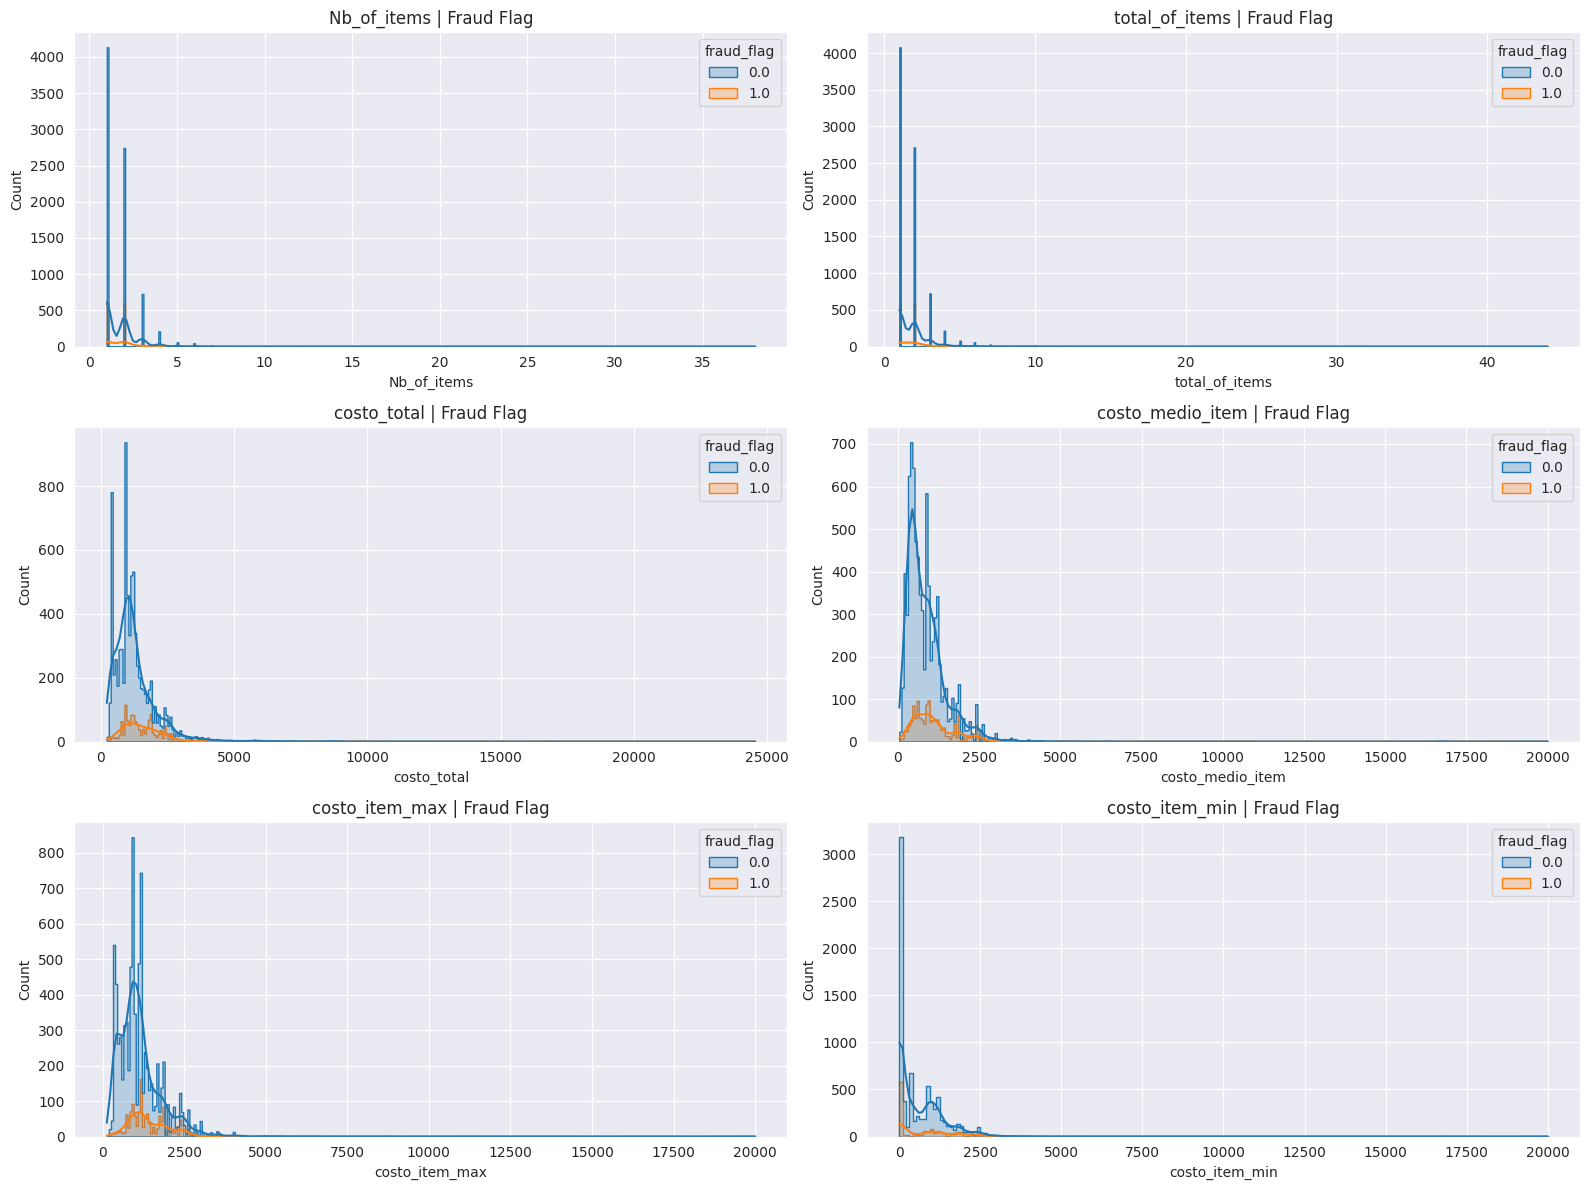

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("darkgrid")

# Columns to plot
selected_columns = ["Nb_of_items",	"total_of_items", "costo_total", "costo_medio_item", "costo_item_max", "costo_item_min"]

# Number of rows and columns for subplots
num_rows = 3
num_columns = 2

# Create a figure and subplots
fig, subplots = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, 12))
subplots = subplots.flatten()  # Flatten the array to easily iterate over subplots

# Plot each feature
for idx, feature in enumerate(selected_columns):
    sns.histplot(data=df, x=feature, hue="fraud_flag", kde=True, element="step", stat="count", ax=subplots[idx])
    subplots[idx].set_title(f"{feature} | Fraud Flag")
    subplots[idx].set_xlabel(feature)
    subplots[idx].set_ylabel("Count")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Resultado del análisis del dataset
Una vez revisados los datos encontramos que:
* Las clases estan desbalanceadas, es decir, hay una mayor cantidad de muestras de "No Fraude" en comparación con las muestras "Fraude"
* Las características tienen diferentes rangos de valores
* No se encontraron valores faltantes
* Hay un gran número de características
* La columna ID es un dentificador único que vamos a remover

## Paso 2. Elección de Modelo de Aprendizaje y construcción de clasificador

Tomando en cuenta el análisis del dataset, consideramos que los algoritmos más adecuados para trabajar este problema son

*   Regresión logística
*   Random Forest

Se considera también el uso de un *perceptrón*, teniendo en cuenta que se deben preprocesar los datos para el correcto funcionamiento de dicho modelo.

## Regresión Logistica

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Buscamos el archivo en el drive de alguno de los integrantes del equipo
zip_file_path="/content/drive/MyDrive/Colab Notebooks/bourbaki/FraudeCanastasModulo1/FraudeCanastas.zip"
csv_file_name="FraudeCanastas.csv"
if not os.path.exists(zip_file_path):
  zip_file_path="/content/drive/MyDrive/Bourbaki/Fraude Canastas Semana 4/FraudeCanastas.zip"
  csv_file_name="FraudeCanastas.csv"

# Abrimos el archivo .zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extraemos el archivo csv
    with zip_ref.open(csv_file_name) as csv_file:
        # Convertimos el archivo csv en un dataframe de pandas
        datos = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Construcción de clasificador

#### Creación de subconjuntos de entrenamiento y prueba

In [ ]:
y = datos["fraud_flag"]
X = datos.drop(columns=["fraud_flag", "ID"])

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')

TRAINING SET
X:  (7455, 2455)
y:  (7455,)
No Fraude:         6403 
Fraude:  1052 

TEST SET
X:  (1864, 2455)
y:  (1864,)
No Fraude:         1597 
Fraude:  267 



### Entrenamiento

Para efectos comparativos, entrenaremos dos modelos, uno sin penalización, y otro con penalización y un valor de lambda encontrado a través de Grid Search Cross Validation.

In [ ]:
lambdas = np.logspace(-4, 4, 50)

In [ ]:
clasificador_rl = LogisticRegression(penalty= None, random_state=4,
                                     solver='newton-cg', class_weight='balanced').fit(X_train, y_train)

In [ ]:
grid_search = GridSearchCV(LogisticRegression(penalty='l2',solver="newton-cg", class_weight='balanced'),
                           {'C': 1/lambdas}, cv=5, return_train_score=False, n_jobs=-1)

grid_search.fit(X_norm, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='newton-cg'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e+04, 6.86648845e+03, 4.71486636e+03, 3.23745754e+03,
       2.22299648e+03, 1.52641797e+03, 1.04811313e+03, 7.19685673e+02,
       4.94171336e+02, 3.39322177e+02, 2.32995181e+02, 1.59985872e+02,
       1.09854114e+02, 7.54312006e+01, 5.17947468e+01, 3...
       1.20679264e+00, 8.28642773e-01, 5.68986603e-01, 3.90693994e-01,
       2.68269580e-01, 1.84206997e-01, 1.26485522e-01, 8.68511374e-02,
       5.96362332e-02, 4.09491506e-02, 2.81176870e-02, 1.93069773e-02,
       1.32571137e-02, 9.10298178e-03, 6.25055193e-03, 4.29193426e-03,
       2.94705170e-03, 2.02358965e-03, 1.38949549e-03, 9.54095476e-04,
       6.55128557e-04, 4.49843267e-04, 3.08884360e-04, 2.12095089e-04,
       1.45634848e-04, 1.00000000e-04])})

In [ ]:
C = grid_search.best_params_['C']
best_lambda = 1 / grid_search.best_params_['C']
print(f"Mejor C: {C}")
print(f"Mejor lambda: {best_lambda}")

Mejor C: 0.18420699693267165
Mejor lambda: 5.428675439323859


Después de realizar el grid search (sin peso de clase) , encontramos que:


*   Mejor valor de C: 0.8286427728546844
*   Mejor valor de Lambda (1/C): 1.2067926406393288



Después de realizar el grid search con peso de clases, encontramos que:


* Mejor C: 0.18420699693267165
* Mejor lambda: 5.428675439323859

In [ ]:
clasificador_rl_gs = LogisticRegression(penalty='l2', C = 5.428675439323859, random_state=4,
                                     solver='newton-cg', class_weight='balanced').fit(X_train, y_train)

### Predicción

In [ ]:
y_predict = clasificador_rl.predict(X_test)
y_predict_gs = clasificador_rl_gs.predict(X_test)

### Evaluación

In [ ]:
acc_train = clasificador_rl.score(X_train, y_train)*100
acc_test = clasificador_rl.score(X_test, y_test)*100
acc_train_gs = clasificador_rl_gs.score(X_train, y_train)*100
acc_test_gs = clasificador_rl_gs.score(X_test, y_test)*100

print("Exactitud conjunto entrenamiento: %.2f%%" % acc_train)
print("Exactitud conjunto prueba: %.2f%%" % acc_test)
print("Exactitud conjunto entrenamiento grid search cross validation: %.2f%%" % acc_train_gs)
print("Exactitud conjunto prueba grid search cross validation: %.2f%%" % acc_test_gs)

recall = recall_score(y_test, y_predict, average='binary')*100
recall_gs = recall_score(y_test, y_predict_gs, average='binary')*100
print(f'Recall del modelo de regresión logística: {recall:.4f}')
print(f'Recall del modelo de regresión logística con GSCV: {recall_gs:.4f}')

Exactitud conjunto entrenamiento: 78.23%
Exactitud conjunto prueba: 73.61%
Exactitud conjunto entrenamiento grid search cross validation: 78.48%
Exactitud conjunto prueba grid search cross validation: 73.71%
Recall del modelo de regresión logística: 77.9026
Recall del modelo de regresión logística con GSCV: 74.1573


Durante la exploración de varios ajustes del clasificador, tenemos que:
Sin datos normalizados:
* Exactitud conjunto entrenamiento: 89.16%
* Exactitud conjunto prueba: 87.55%

Con datos normalizados:
* Exactitud conjunto entrenamiento: 89.00%
* Exactitud conjunto prueba: 87.45%

Finalmente después de decidir enfocarnos en mejorar el recall, proponemos dos modelos, y tenemos que:
Con datos normalizados y pesos de clase balanceados
* Exactitud conjunto entrenamiento: 78.23%
* Exactitud conjunto prueba: 73.61%
* Recall del modelo de regresión logística en el conjunto de prueba: 77.9026

Con datos normalizados, pesos de clase balanceados, penalización Ridge y mejor valor de C para GSCV
* Exactitud conjunto entrenamiento grid search cross validation: 78.48%
* Exactitud conjunto prueba grid search cross validation: 73.71%
* Recall del modelo de regresión logística, penalización ridge y GSCV en el conjunto de prueba: 74.1573

In [ ]:
data_rl = {'Y_Real': y_test,
           'Y_Prediccion': y_predict,
           'Y_Prediccion_GS': y_predict_gs}
df_rl = pd.DataFrame(data_rl)
df_rl

,Y_Real,Y_Prediccion,Y_Prediccion_GS
1788,0.0,0.0,0.0
7671,0.0,0.0,0.0
2284,0.0,1.0,1.0
2016,0.0,1.0,1.0
5506,0.0,0.0,0.0
...,...,...,...
2795,0.0,0.0,0.0
2499,0.0,0.0,0.0
4797,0.0,0.0,0.0
5632,0.0,0.0,0.0


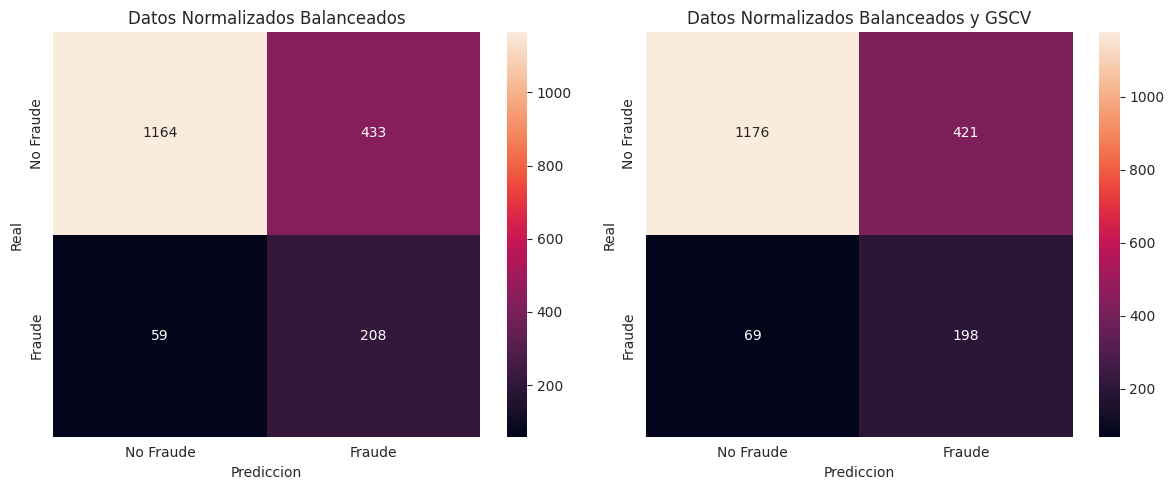

In [ ]:
# Matriz de confusión
confusion_matrix_rl = pd.crosstab(df_rl['Y_Real'],
                               df_rl['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_rl_gs = pd.crosstab(df_rl['Y_Real'],
                               df_rl['Y_Prediccion_GS'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

# Reemplazamos 0 y 1 por etiquetas personalizadas
custom_labels = {0: 'No Fraude', 1: 'Fraude'}
confusion_matrix_rl.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_rl_gs.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first confusion matrix
sns.heatmap(confusion_matrix_rl, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Datos Normalizados Balanceados')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_rl_gs, annot=True, fmt='g', ax=axes[1])
axes[1].set_title('Datos Normalizados Balanceados y GSCV')

plt.tight_layout()
plt.show()

### Curva ROC

Area bajo la curva entre:

* True Positive Rate  (Sensitivity) :   Verdaderos Positivos / Positivos
* False Positive Rate (1-Specificity): Falsos Positivos / Negativos  

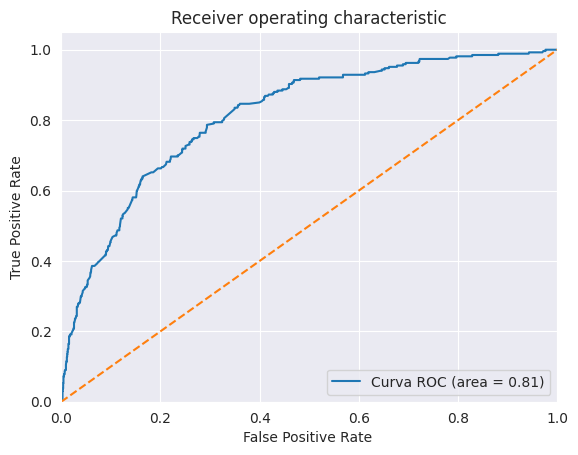

In [ ]:
y_test_score = clasificador_rl_gs.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_score)

roc_df = pd.DataFrame({'fpr': fpr,
                       'tpr':tpr,
                       'umbral_decision': thresholds,
                       'Error Min': np.sqrt((fpr)**2 + (1-tpr)**2),
                       })

roc_df

#Area bajo la curva (AUC, por sus siglas en inglés)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label="Curva ROC (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate ")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_df.sort_values('Error Min').head(1)

,fpr,tpr,umbral_decision,Error Min
217,0.293676,0.786517,0.443596,0.363071


Utilizando la curva roc y el area bajo la curva, observamos que el umbral de decisión que mejor minimiza los errores es de 0.443596. De tal manera, que ajustando las etiquetas con este umbral obtenemos los siguientes resultados.

In [ ]:
resultados = {'P(No Fraude)': clasificador_rl.predict_proba(X_test)[:,0],
              'P(Fraude)': clasificador_rl.predict_proba(X_test)[:,1],
              'y_pred': clasificador_rl.predict(X_test)}

resultados_gs = {'P(No Fraude)': clasificador_rl_gs.predict_proba(X_test)[:,0],
                 'P(Fraude)': clasificador_rl_gs.predict_proba(X_test)[:,1],
                 'y_pred': clasificador_rl_gs.predict(X_test)}

predicciones = pd.DataFrame(resultados)
predicciones_gs = pd.DataFrame(resultados_gs)

In [ ]:
predicciones['y_prob_443596'] = np.where(predicciones['P(Fraude)'] > 0.443596, 1.0, 0.0)
predicciones

,P(No Fraude),P(Fraude),y_pred,y_prob_443596
0,0.932800,6.720031e-02,0.0,0.0
1,1.000000,1.340033e-07,0.0,0.0
2,0.267449,7.325509e-01,1.0,1.0
3,0.251356,7.486443e-01,1.0,1.0
4,0.594606,4.053938e-01,0.0,0.0
...,...,...,...,...
1859,0.999996,3.637359e-06,0.0,0.0
1860,0.962771,3.722917e-02,0.0,0.0
1861,1.000000,1.190704e-11,0.0,0.0
1862,0.502912,4.970878e-01,0.0,1.0


In [ ]:
predicciones_gs['y_prob_443596'] = np.where(predicciones_gs['P(Fraude)'] > 0.443596, 1.0, 0.0)
predicciones_gs

,P(No Fraude),P(Fraude),y_pred,y_prob_443596
0,0.871911,0.128089,0.0,0.0
1,0.952408,0.047592,0.0,0.0
2,0.310280,0.689720,1.0,1.0
3,0.342306,0.657694,1.0,1.0
4,0.598377,0.401623,0.0,0.0
...,...,...,...,...
1859,0.830225,0.169775,0.0,0.0
1860,0.894122,0.105878,0.0,0.0
1861,0.899874,0.100126,0.0,0.0
1862,0.557149,0.442851,0.0,0.0


In [ ]:
recall = recall_score(y_test, predicciones['y_prob_443596'], average='binary')*100
recall_gs = recall_score(y_test, predicciones_gs['y_prob_443596'], average='binary')*100
print(f'Recall del modelo de regresión logística: {recall:.4f}')
print(f'Recall del modelo de regresión logística con GSCV: {recall_gs:.4f}')

Recall del modelo de regresión logística: 81.6479
Recall del modelo de regresión logística con GSCV: 78.2772


Después del ajuste del umbral con la curva ROC, tenemos que:
* Exactitud del modelo de regresión logística: 71.2446
* Recall del modelo de regresión logística: 81.6479
* Exactitud del modelo de regresión logística, penalización ridge y GSCV: 71.7274
* Recall del modelo de regresión logística, penalización ridge y GSCV: 78.2772


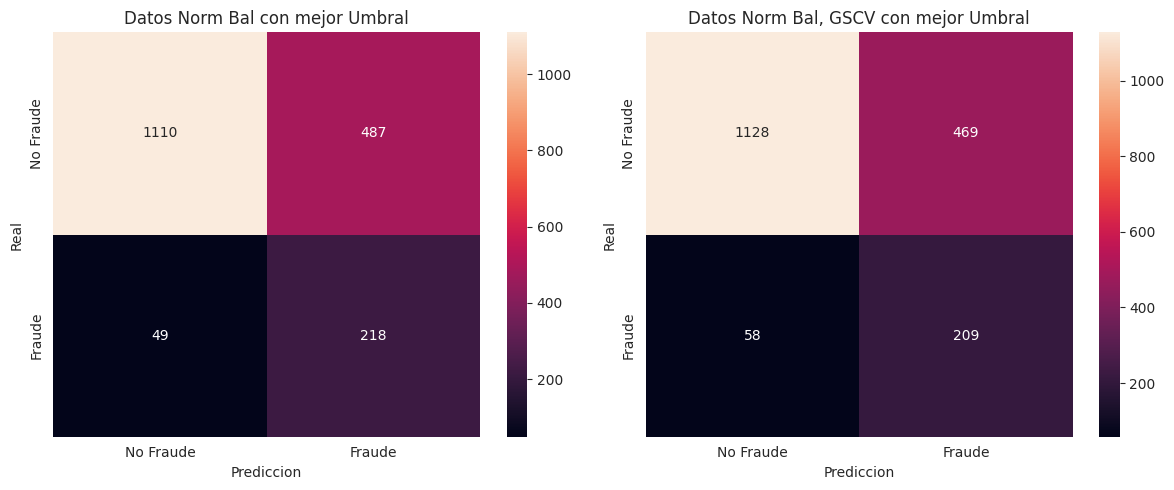

In [ ]:
# creamos un diccionario con las etiquetas
data = {'Y_Real': y_test.to_numpy(),
        'Y_Prediccion': predicciones['y_prob_443596']
        }

data_gs = {'Y_Real':y_test.to_numpy(),
           'Y_Prediccion': predicciones_gs['y_prob_443596']}

# lo convertimos en un DataFrame de pandas
df = pd.DataFrame(data)
df_gs = pd.DataFrame(data_gs)

# Matriz de confusión
confusion_matrix_rl = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_rl_gs = pd.crosstab(df_gs['Y_Real'],
                               df_gs['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

# Reemplazamos 0 y 1 por etiquetas personalizadas
custom_labels = {0: 'No Fraude', 1: 'Fraude'}
confusion_matrix_rl.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_rl_gs.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first confusion matrix
sns.heatmap(confusion_matrix_rl, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Datos Norm Bal con mejor Umbral')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_rl_gs, annot=True, fmt='g', ax=axes[1])
axes[1].set_title('Datos Norm Bal, GSCV con mejor Umbral')

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
!pip install dtreeviz  # versión 2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
import zipfile
import numpy as np
import pandas as pd
import os
# Funciones específicas de Sckit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
# Para visualizar el árbol de decisión
import graphviz
import dtreeviz

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Buscamos el archivo en el drive de alguno de los integrantes del equipo
zip_file_path="/content/drive/MyDrive/Colab Notebooks/bourbaki/FraudeCanastasModulo1/FraudeCanastas.zip"
csv_file_name="FraudeCanastas.csv"
if not os.path.exists(zip_file_path):
  zip_file_path="/content/drive/MyDrive/Bourbaki/Fraude Canastas Semana 4/FraudeCanastas.zip"
  csv_file_name="FraudeCanastas.csv"

# Abrimos el archivo .zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extraemos el archivo csv
    with zip_ref.open(csv_file_name) as csv_file:
        # Convertimos el archivo csv en un dataframe de pandas
        datos = pd.read_csv(csv_file)

# Quitamos la columna ID
datos.drop(columns=["ID"], inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Construcción del clasificador

#### Creación de subconjuntos de entrenamiento y prueba

In [ ]:
y = datos["fraud_flag"]
X = datos.drop(columns=["fraud_flag"])

In [ ]:
y.value_counts()

,count
fraud_flag,
0.0,8000
1.0,1319


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("TRAINING SET")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')

print("TEST SET")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')

TRAINING SET
X:  (7455, 2455)
y:  (7455,)
No Fraude:         6403 
Fraude:  1052 

TEST SET
X:  (1864, 2455)
y:  (1864,)
No Fraude:         1597 
Fraude:  267 



### Entrenamiento con scoring accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define el modelo base
# Habilitamos el paŕametro class_weight='balanced' para darle un mayor peso a la clase minoritaria
# clf_rf = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy')
# max_depth_values = np.logspace(np.log10(10), np.log10(2455), num=5, dtype=int)
# 'n_estimators': [100, 200, 500, 1000, 1500, 2000],
clf_rf = RandomForestClassifier(random_state=0, criterion='entropy', n_jobs=-1)
max_depth_values = np.logspace(np.log10(10), np.log10(1000), num=5, dtype=int)
print(f"max_depth_values {max_depth_values}")


# Define los parámetros para el GridSearch
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': max_depth_values
}

# Configura el GridSearch
# Seleccionamos el scoring recall para darle más importancia a clasificar correctamente los casos de "Fraude"
grid_search = GridSearchCV(estimator=clf_rf, param_grid=param_grid, cv=5, scoring='accuracy',n_jobs=-1)

max_depth_values [  10   31  100  316 1000]


In [ ]:
# Entrena el modelo utilizando GridSearch
grid_search.fit(X_train, y_train)

# Obtén los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
# Explorar los resultados de las combinaciones de parámetros
print(pd.DataFrame(grid_search.cv_results_))
print(f"Mejores parámetros encontrados: {best_params}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.988828      0.804407         0.252924        0.060267   
1        6.153423      0.384409         0.272310        0.064460   
2       10.746745      1.041639         0.357575        0.079644   
3       21.633828      1.376321         0.588541        0.024812   
4        7.944026      1.642747         0.181392        0.054287   
5       13.689702      0.503346         0.309662        0.074670   
6       35.094519      1.063585         0.564148        0.146221   
7       69.766360      2.354248         1.065077        0.192047   
8       14.000327      0.661471         0.268361        0.035148   
9       27.670137      1.161592         0.424635        0.079883   
10      68.411179      1.191397         0.935266        0.271526   
11     135.686623      2.693479         1.638192        0.327028   
12      14.725534      0.212600         0.232833        0.025194   
13      27.569561      0.982436         0.451703

Mejores parámetros encontrados: {'max_depth': 316, 'n_estimators': 1000}

In [ ]:
clf_rf = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=316, n_estimators=1000,n_jobs=-1).fit(X_train, y_train)

In [ ]:
y_train_pred = clf_rf.predict(X_train)
# report = classification_report(y_train, y_train_pred)
# print(report)
recall = recall_score(y_train, y_train_pred, average='binary')*100
print(f'Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: {recall:.2f}%')
print("Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: {:4.2f}%, ".format(accuracy_score(y_train, y_train_pred)*100))

Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: 54.37%
Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: 92.42%, 


* Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: 54.37%
* Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: 92.42%,

### Predicción con scoring accuracy

In [ ]:
y_pred = clf_rf.predict(X_test)
recall = recall_score(y_test, y_pred, average='binary')*100
print(f'Recall del modelo Bosque Aleatorio en el conjunto de prueba: {recall:.2f}%')
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Recall del modelo Bosque Aleatorio en el conjunto de prueba: 35.96%
Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 88.57%


* Recall del modelo Bosque Aleatorio en el conjunto de prueba: 35.96%
* Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 88.57%

### Evaluación con scoring accuracy

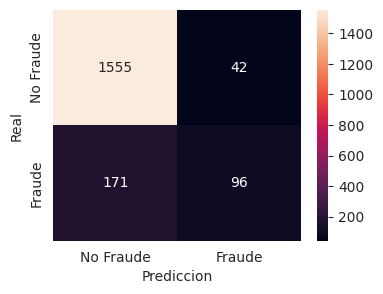

In [ ]:
# Your existing data
data = {'y_Real': y_test,
        'y_Prediccion': y_pred}

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Prediccion'])

# Replace the 0 and 1 labels with custom labels
custom_labels = {0: 'No Fraude', 1: 'Fraude'}

# Rename the index and columns of the confusion matrix
confusion_matrix.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax)
plt.show()

### Entrenamiento con scoring recall

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define el modelo base
# Habilitamos el paŕametro class_weight='balanced' para darle un mayor peso a la clase minoritaria
clf_rf_recall = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy', n_jobs=-1)
max_depth_values = np.logspace(np.log10(10), np.log10(1000), num=5, dtype=int)
print(f"max_depth_values {max_depth_values}")


# Define los parámetros para el GridSearch
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': max_depth_values
}

# Configura el GridSearch
# Seleccionamos el scoring recall para darle más importancia a clasificar correctamente los casos de "Fraude"
grid_search_recall = GridSearchCV(estimator=clf_rf_recall, param_grid=param_grid, cv=5, scoring='recall',n_jobs=-1)

max_depth_values [  10   31  100  316 1000]


In [ ]:
# Entrena el modelo utilizando GridSearch
grid_search_recall.fit(X_train, y_train)

# Obtén los mejores parámetros y el mejor modelo
best_params = grid_search_recall.best_params_
best_rf = grid_search_recall.best_estimator_
# Explorar los resultados de las combinaciones de parámetros
print(pd.DataFrame(grid_search_recall.cv_results_))
print(f"Mejores parámetros encontrados: {best_params}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        2.320163      0.466831         0.131962        0.048765   
1        4.625294      1.090097         0.205242        0.062593   
2       11.041902      0.753515         0.402035        0.089438   
3       22.051293      1.341776         0.655786        0.163295   
4        6.759803      1.039828         0.171671        0.056705   
5       14.083807      0.865394         0.292939        0.060739   
6       34.552021      0.767816         0.655114        0.148686   
7       68.716836      0.948966         1.000903        0.232195   
8       14.309385      0.207838         0.219775        0.021882   
9       27.500798      0.936286         0.350261        0.063192   
10      69.075038      1.031521         0.933866        0.184862   
11     137.093340      2.835273         1.442780        0.065188   
12      14.680089      0.126834         0.241562        0.036317   
13      28.026758      0.817368         0.463120

Mejores parámetros encontrados: {'max_depth': 10, 'n_estimators': 1000}

In [ ]:
clf_rf_recall = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy', max_depth=10, n_estimators=1000,).fit(X_train, y_train)

In [ ]:
y_train_pred = clf_rf_recall.predict(X_train)
# report = classification_report(y_train, y_train_pred)
# print(report)
recall = recall_score(y_train, y_train_pred, average='binary')*100
print(f'Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: {recall:.2f}%')
print("Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: {:4.2f}%, ".format(accuracy_score(y_train, y_train_pred)*100))

Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: 0.84%
Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: 70.57%, 


* Recall del modelo Bosque Aleatorio en el conjunto de entrenamiento: 83.94%
* Exactitud del modelo Bosque Aleatorio en el conjunto de entrenamiento: 70.57%

### Predicción con scoring recall

In [ ]:
y_pred_recall = clf_rf_recall.predict(X_test)
recall = recall_score(y_test, y_pred_recall, average='binary')*100
print(f'Recall del modelo Bosque Aleatorio en el conjunto de prueba: {recall:.2f}%')
print("Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: {:4.2f}%".format(accuracy_score(y_test, y_pred)*100))

Recall del modelo Bosque Aleatorio en el conjunto de prueba: 76.78%
Exactitud del modelo Bosque Aleatorio en el conjunto de prueba: 88.57%


* Recall del modelo Bosque Aleatorio (con pesos de clase y grid search con objetivo de recall)en el conjunto de prueba: 76.78%
* Exactitud del modelo Bosque (con pesos de clase y grid search con objetivo de recall) en el conjunto de prueba: 88.57%

### Evaluación con scoring recall

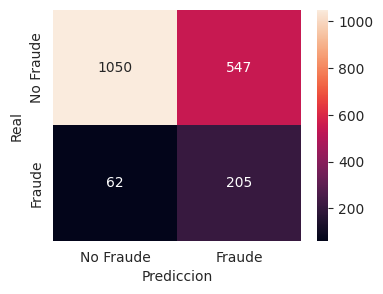

In [ ]:
# Your existing data
data = {'y_Real': y_test,
        'y_Prediccion': y_pred_recall}

evaluacion_df = pd.DataFrame(data)
confusion_matrix = pd.crosstab(evaluacion_df['y_Real'], evaluacion_df['y_Prediccion'], rownames=['Real'], colnames=['Prediccion'])

# Replace the 0 and 1 labels with custom labels
custom_labels = {0: 'No Fraude', 1: 'Fraude'}

# Rename the index and columns of the confusion matrix
confusion_matrix.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax)
plt.show()

,0
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,0.000000
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,0.000002
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,0.000214
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,0.002165
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,0.000386


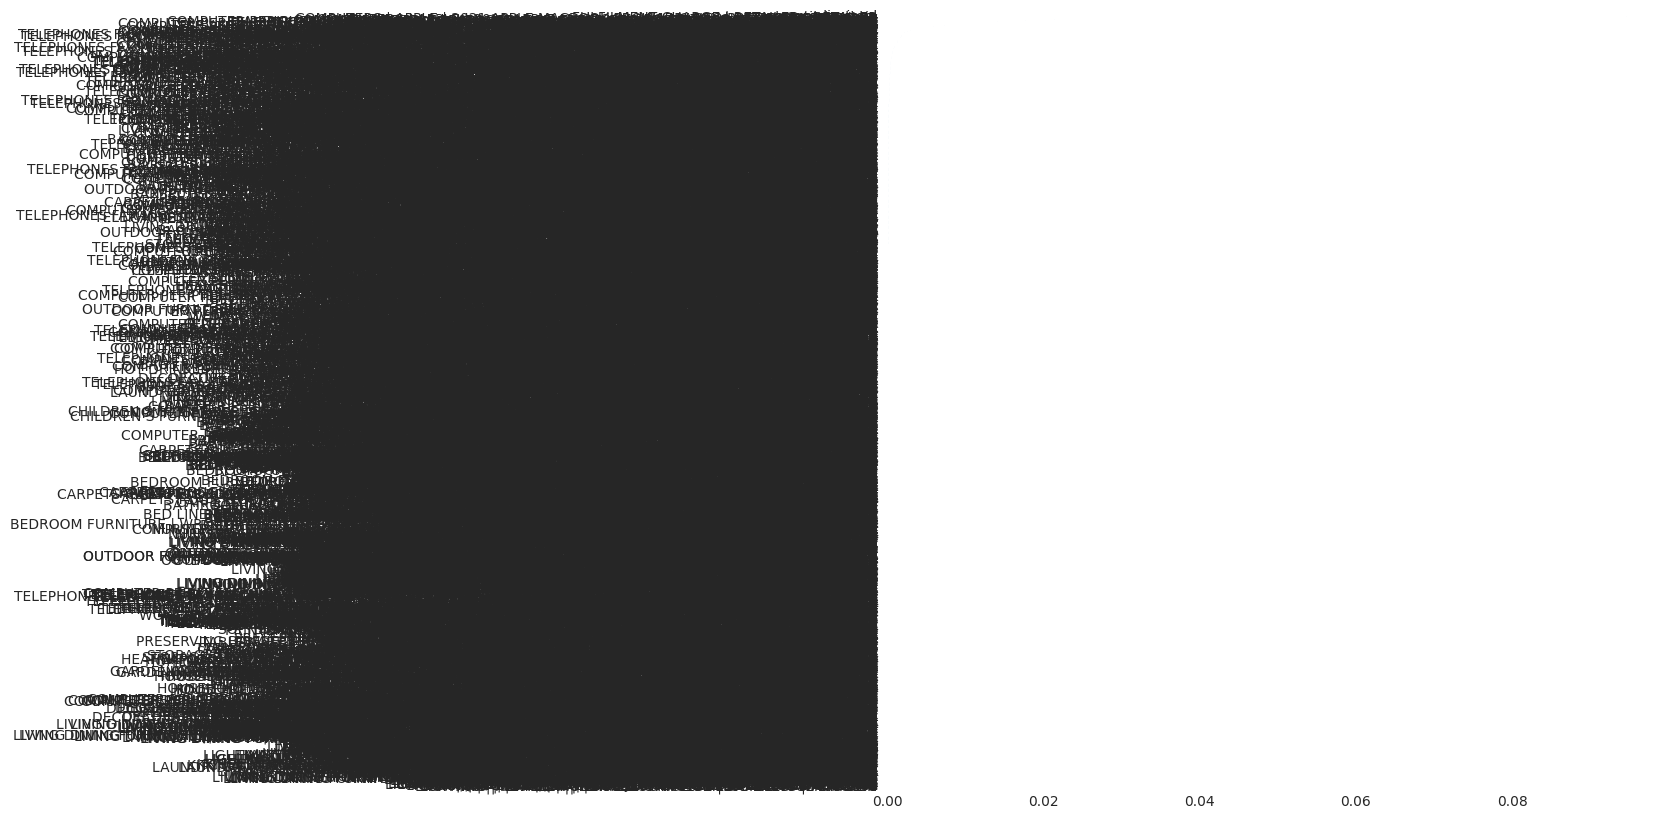

In [ ]:
# importances = clf_rf_recall.feature_importances_
# weights = pd.Series(importances,
#                     index=X.columns.values)
# weights.sort_values().plot(kind = 'barh',figsize=(10, 10))
# weights.head()

## Perceptrón Simple

In [ ]:
import os
import pandas as pd
# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import recall_score

In [ ]:
# Biblioteca para manejar matrices y operaciones de matrices
import numpy as np

### Lectura de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Buscamos el archivo en el drive de alguno de los integrantes del equipo
zip_file_path="/content/drive/MyDrive/Colab Notebooks/bourbaki/FraudeCanastasModulo1/FraudeCanastas.zip"
csv_file_name="FraudeCanastas.csv"
if not os.path.exists(zip_file_path):
  zip_file_path="/content/drive/MyDrive/Bourbaki/Fraude Canastas Semana 4/FraudeCanastas.zip"
  csv_file_name="FraudeCanastas.csv"

# Abrimos el archivo .zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extraemos el archivo csv
    with zip_ref.open(csv_file_name) as csv_file:
        # Convertimos el archivo csv en un dataframe de pandas
        datos = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Construcción del clasificador

In [ ]:
y = datos["fraud_flag"]
X = datos.drop(columns=["fraud_flag", "ID"])

Ya que contamos con diferentes rangos de valores en el dataset, vamos a preprocesarlos para trabajar de mejor manera con el Perceptrón.

Trabajaremos con dos métodos:


*   Normalización
*   Estandarización



In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#print(X_norm)

In [ ]:
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the data
X_stand = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
#print(X_stand)

### Entrenamiento con datos normalizados

#### Creación de subconjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('No fraude:         ', counts[0],'\nFraude: ', counts[1],'\n')

Training set
X:  (7455, 2455)
y:  (7455,)
No Fraude:         6403 
Fraude:  1052 

Test set
X:  (1864, 2455)
y:  (1864,)
No fraude:          1597 
Fraude:  267 



Ya que contamos con un dataset desbalanceado, también exploraremos la opción que nos da el perceptrón de SKLearn de cambiar los pesos de clase, para intentar otro acercamiento al problema.

In [ ]:
# Creamos nuestro modelo de clasificación
model = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model.fit(X_train, y_train)

model_bal = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001, class_weight='balanced')
model_bal.fit(X_train, y_train)

print("Iteraciones: ", model.n_iter_)
print("Iteraciones: ", model_bal.n_iter_)

Iteraciones:  7
Iteraciones:  10


### Predicción con datos normalizados

In [ ]:
y_predict = model.predict(X_test)
y_predict_bal = model_bal.predict(X_test)

### Evaluación con datos normalizados

In [ ]:
acc_train_norm = model.score(X_train, y_train)*100.0
acc_test_norm = model.score(X_test, y_test)*100.0

acc_train_norm_bal = model.score(X_train, y_train)*100.0
acc_test_norm_bal = model.score(X_test, y_test)*100.0

print("Exactitud conjunto entrenamiento sin balanceo: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba sin balanceo: %.2f%%" % (model.score(X_test, y_test)*100.0))

print("Exactitud conjunto entrenamiento con balanceo de clases: %.2f%%" % (model_bal.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba con balanceo de clases: %.2f%%" % (model_bal.score(X_test, y_test)*100.0))

recall = recall_score(y_test, y_predict, average='binary')*100
recall_bal = recall_score(y_test, y_predict_bal, average='binary')*100
print(f'Recall del modelo sin balanceo: {recall:.2f}%')
print(f'Recall del modelo con balanceo de clases: {recall_gs:.2f}%')

Exactitud conjunto entrenamiento sin balanceo: 86.83%
Exactitud conjunto prueba sin balanceo: 85.84%
Exactitud conjunto entrenamiento con balanceo de clases: 59.28%
Exactitud conjunto prueba con balanceo de clases: 56.12%
Recall del modelo sin balanceo: 5.62%
Recall del modelo con balanceo de clases: 78.28%


Evaluando el perceptrón tenemos que:
* Exactitud conjunto entrenamiento sin balanceo: 86.83%
* Exactitud conjunto prueba sin balanceo: 85.84%
* Exactitud conjunto entrenamiento con balanceo de clases: 59.28%
* Exactitud conjunto prueba con balanceo de clases: 56.12%
* Recall del modelo sin balanceo (conjunto de prueba): 5.62%
* Recall del modelo con balanceo de clases (conjunto de prueba): 78.28%

In [ ]:
data_norm = {'Y_Real':  y_test,
        'Y_Prediccion': y_predict,
        'Y_Prediccion_Bal': y_predict_bal
        }
df_norm = pd.DataFrame(data_norm)
df_norm

,Y_Real,Y_Prediccion,Y_Prediccion_Bal
1788,0.0,0.0,0.0
7671,0.0,0.0,0.0
2284,0.0,0.0,1.0
2016,0.0,0.0,1.0
5506,0.0,0.0,1.0
...,...,...,...
2795,0.0,0.0,0.0
2499,0.0,0.0,0.0
4797,0.0,0.0,0.0
5632,0.0,0.0,1.0


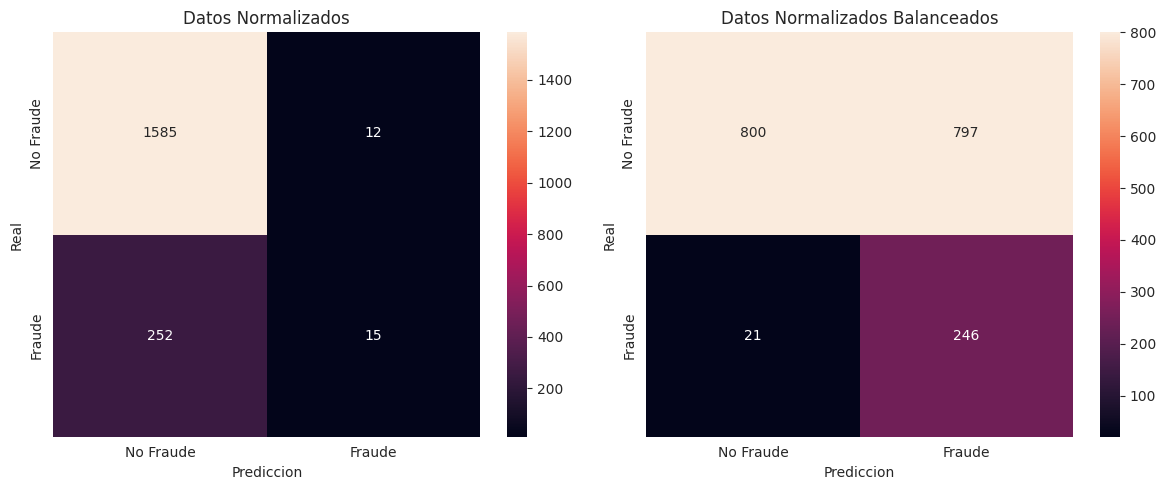

In [ ]:
# Matriz de confusión
confusion_matrix_norm = pd.crosstab(df_norm['Y_Real'],
                               df_norm['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_norm_bal = pd.crosstab(df_norm['Y_Real'],
                               df_norm['Y_Prediccion_Bal'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

# Reemplazamos 0 y 1 por etiquetas personalizadas
custom_labels = {0: 'No Fraude', 1: 'Fraude'}
confusion_matrix_norm.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_norm_bal.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first confusion matrix
sns.heatmap(confusion_matrix_norm, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Datos Normalizados')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_norm_bal, annot=True, fmt='g', ax=axes[1])
axes[1].set_title('Datos Normalizados Balanceados')

plt.tight_layout()
plt.show()

### Entrenamiento con datos estandarizados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_stand, y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('No Fraude:        ', counts[0],'\nFraude: ', counts[1],'\n')


print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('No fraude:         ', counts[0],'\nFraude: ', counts[1],'\n')

Training set
X:  (7455, 2455)
y:  (7455,)
No Fraude:         6403 
Fraude:  1052 

Test set
X:  (1864, 2455)
y:  (1864,)
No fraude:          1597 
Fraude:  267 



Ya que contamos con un dataset desbalanceado, también exploraremos la opción que nos da el perceptrón de SKLearn de cambiar los pesos de clase, para intentar otro acercamiento al problema.

In [ ]:
# Creamos nuestro modelo de clasificación
model = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model.fit(X_train, y_train)

model_bal = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001, class_weight='balanced')
model_bal.fit(X_train, y_train)

print("Iteraciones: ", model.n_iter_)
print("Iteraciones: ", model_bal.n_iter_)

Iteraciones:  17
Iteraciones:  17


### Predicción con datos estandarizados

In [ ]:
y_predict = model.predict(X_test)
y_predict_bal = model_bal.predict(X_test)

### Evaluación con datos estandarizados

In [ ]:
acc_train_stand = model.score(X_train, y_train)*100.0
acc_test_stand = model.score(X_test, y_test)*100.0

acc_train_stand = model_bal.score(X_train, y_train)*100.0
acc_test_stand = model_bal.score(X_test, y_test)*100.0

print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test, y_test)*100.0))

print("Exactitud conjunto entrenamiento: %.2f%%" % (model_bal.score(X_train, y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model_bal.score(X_test, y_test)*100.0))

recall = recall_score(y_test, y_predict, average='binary')*100
recall_bal = recall_score(y_test, y_predict_bal, average='binary')*100
print(f'Recall del modelo sin balanceo: {recall:.2f}%')
print(f'Recall del modelo con balanceo de clases: {recall_bal:.2f}%')

Exactitud conjunto entrenamiento: 84.52%
Exactitud conjunto prueba: 75.64%
Exactitud conjunto entrenamiento: 71.08%
Exactitud conjunto prueba: 62.82%
Recall del modelo sin balanceo: 43.07%
Recall del modelo con balanceo de clases: 61.05%


Evaluando el Perceptrón con datos estandarizados, tenemos que:

* Exactitud conjunto entrenamiento: 84.52%
* Exactitud conjunto prueba: 75.64%
* Exactitud conjunto entrenamiento: 71.08%
* Exactitud conjunto prueba: 62.82%
* Recall del modelo sin balanceo (conjunto de prueba): 43.07%
* Recall del modelo con balanceo de clases (conjunto de prueba): 61.05%


In [ ]:
data_stand = {'Y_Real': y_test,
        'Y_Prediccion': y_predict,
        'Y_Prediccion_Bal': y_predict_bal
        }
df_stand = pd.DataFrame(data_stand)
df_stand

,Y_Real,Y_Prediccion,Y_Prediccion_Bal
1788,0.0,0.0,0.0
7671,0.0,0.0,0.0
2284,0.0,0.0,0.0
2016,0.0,1.0,1.0
5506,0.0,0.0,1.0
...,...,...,...
2795,0.0,0.0,0.0
2499,0.0,0.0,0.0
4797,0.0,0.0,0.0
5632,0.0,0.0,1.0


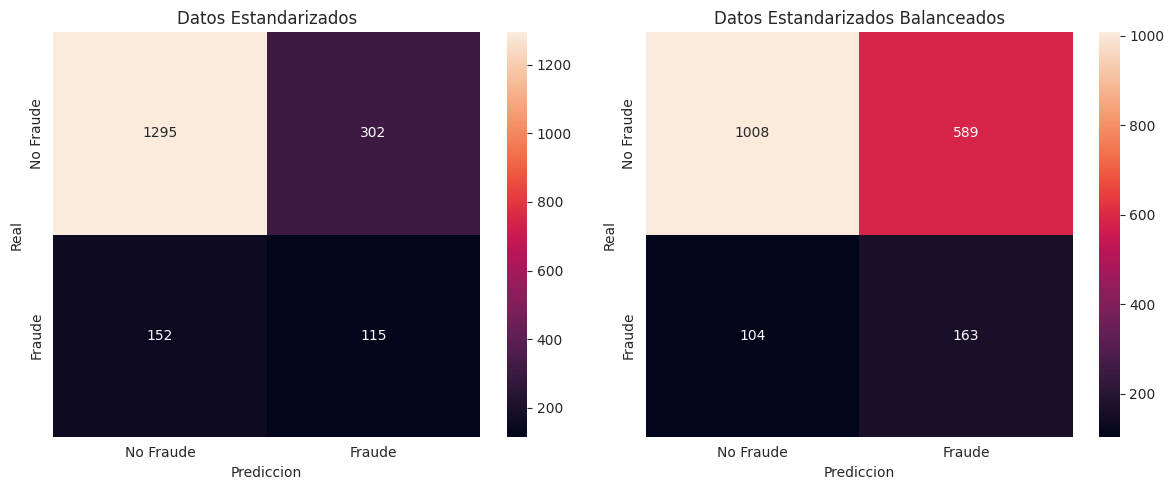

In [ ]:
# Matriz de confusión
confusion_matrix_stand = pd.crosstab(df_stand['Y_Real'],
                               df_stand['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_stand_bal = pd.crosstab(df_stand['Y_Real'],
                               df_stand['Y_Prediccion_Bal'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

# Reemplazamos 0 y 1 por etiquetas personalizadas
custom_labels = {0: 'No Fraude', 1: 'Fraude'}
confusion_matrix_stand.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_stand_bal.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot first confusion matrix
sns.heatmap(confusion_matrix_stand, annot=True, fmt='g', ax=axes[0])
axes[0].set_title('Datos Estandarizados')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_stand_bal, annot=True, fmt='g', ax=axes[1])
axes[1].set_title('Datos Estandarizados Balanceados')

plt.tight_layout()
plt.show()

Comparación entre Perceptrón Normalizado, Normalizado Balanceado, Estandarizado, Estandarizado Balanceado

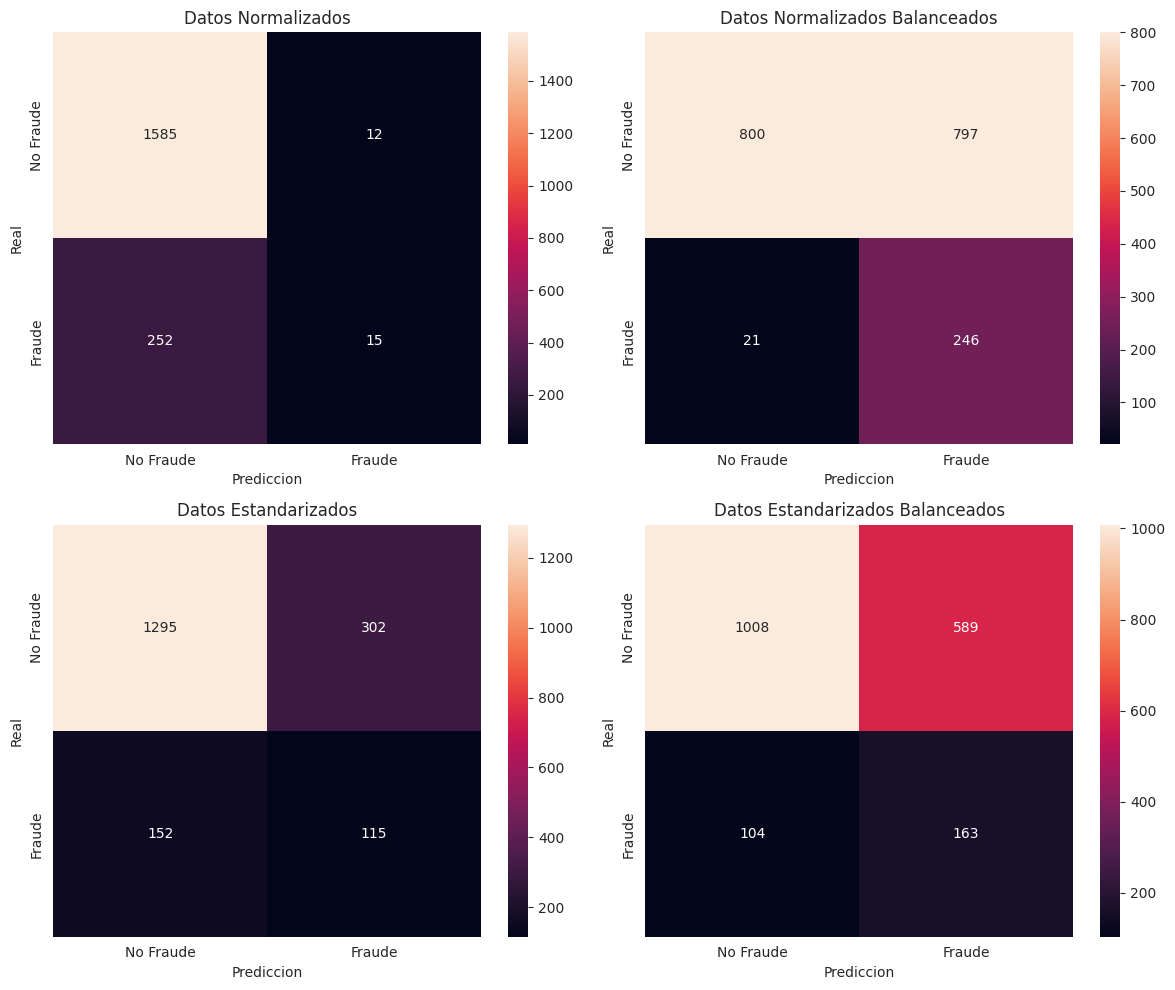

In [ ]:
# Matriz de confusión
confusion_matrix_norm = pd.crosstab(df_norm['Y_Real'],
                               df_norm['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_norm_bal = pd.crosstab(df_norm['Y_Real'],
                               df_norm['Y_Prediccion_Bal'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_stand = pd.crosstab(df_stand['Y_Real'],
                               df_stand['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

confusion_matrix_stand_bal = pd.crosstab(df_stand['Y_Real'],
                               df_stand['Y_Prediccion_Bal'],
                               rownames=['Real'],
                               colnames=['Prediccion'])

# Reemplazamos 0 y 1 por etiquetas personalizadas
custom_labels = {0: 'No Fraude', 1: 'Fraude'}
confusion_matrix_norm.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_norm_bal.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_stand.rename(index=custom_labels, columns=custom_labels, inplace=True)
confusion_matrix_stand_bal.rename(index=custom_labels, columns=custom_labels, inplace=True)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot first confusion matrix
sns.heatmap(confusion_matrix_norm, annot=True, fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('Datos Normalizados')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_norm_bal, annot=True, fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('Datos Normalizados Balanceados')

# Plot first confusion matrix
sns.heatmap(confusion_matrix_stand, annot=True, fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('Datos Estandarizados')

# Plot second confusion matrix
sns.heatmap(confusion_matrix_stand_bal, annot=True, fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Datos Estandarizados Balanceados')

plt.tight_layout()
plt.show()

# Resumen

**Implementación de un Modelo de Clasificación para un problema de detección de fraude en canastas de compras**
---
Este documento presenta un análisis sobre 3 tipos de modelos de clasificación, *Regresión Logística*, *Random Forest* y *Perceptrón*, con el objetivo de comparar la efectividad de cada uno de ellos y evaluar su rendimiento en un conjunto de datos de fraude de canastas de compra.

**Análisis del dataset**

El conjunto de datos empleado para entrenar y evaluar el modelo proviene del siguiente documento, que incluye 9319 registros, que a su vez cuentan con 2455 características, mas un ID único y una etiqueta de clase.
* https://drive.google.com/file/d/15OBncvHCIEbNLjQcJqA2yWE37hVt1Usb/view

* Las clases estan desbalanceadas, es decir, hay una mayor cantidad de muestras de "No Fraude" (8,000) en comparación con las muestras "Fraude" (1,319)
* Las características tienen diferentes rangos de valores


**Metodología**:

* Preprocesamiento: Para la *Regresión Logística* y el *Perceptrón*, se normalizaron los datos con el algoritmo MinMax de SKLearn. Adicionalmente, para el Perceptrón se evalúo la estandarizaron de los datos con el algoritmo StandardScaler de SKLearn. Para todos los modelos se realizó una división del conjunto de datos de entrenamiento 80% y prueba 20%.

* Entrenamiento:
  1. Regresión Logística
     Se entrenó utilizando el algoritmo de SKLearn llamado LogisticRegression (con pesos de clase balanceados). Se crearon dos modelos, uno sin penalización y otro con penalización Ridge y un valor de C encontrado a través de Grid Search Cross Validation (GSCV).

  2. Random Forest
     Se entrenó utilizando el algoritmo de SKLearn llamado RandomForestClassifier. Se utilizó a su vez el algoritmo de GSCV en dos ocasiones, una priorizando la exactitud y otra priorizando la sensibilidad.

  3. Perceptrón
     Se entrenó utilizando el algoritmo de SKLearn llamado Perceptron. Se entrenaron 2 modelos, con y sin peso de clase balanceados, con 2 variantes cada uno, con datos normalizados y datos estandarizados. (4 modelos en total)

* Evaluación:
Se utilizó en un principio la métrica de *exactitud* para evaluar los modelos, sin embargo, después de un segundo análisis del problema con ayuda de la matriz de confusión, se optó por priorizar la *sensibilidad*, para aumentar la detección de casos de fraude (verdaderos positivos) y minimizar los falsos negativos (error tipo 2).
---
**Resultados y Análisis**
1. Regresión Logística
El mejor modelo de *Regresión logística* en cuanto a *sensibilidad* fue el que no utilizó penalización Ridge pero si utilizó el ajuste de la curva ROC, obteniendo una *sensibilidad* del **81.64%** y una *exactitud* de **71.24%**. El modelo con penalización Ridge, valor de C con GSCV y ajuste de la curva ROC obtuvo una *senbilidad* del **78.27%** y una *exactitud* de **71.72%**.

2. Random Forest
El mejor modelo de *Random Forest* en cuanto a *sensibilidad* fue el entrenado después de usar GSCV priorizando la *sensibilidad*, pues obtuvo una *sensibilidad* del **76.78%** y una *exactitud* de **88.57%**.

3. Perceptrón
El mejor modelo de *Perceptrón* en cuanto a *sensibilidad* fue el entrenado con datos normalizados y pesos de clase balanceados, obteniendo una *sensibilidad* del **78.28%** y una exactitud de **56.12%**.

---
**Conclusiones**
Los 3 algoritmos demostraron tener niveles de *sensibilidad* muy cercanos, **81%**, **76%** y **78%** respectivamente. Por lo tanto, teniendo en cuenta que tenemos un conjunto de datos desbalanceado, los 3 aportan una solución bastante positiva.

En cuanto a la exactitud sus valores estuvieron entre **71%**, **88%** y **56%**, respectivamente. Para este problema, el Perceptrón tiene más dificultad para clasificar el dataset desbalanceado.

Dado lo anterior, el *Random Forest* obtuvo mejores combinaciones de *sensibilidad* y *exactitud*. Tanto la *Regresión Logística* como el *Perceptrón* disminuyeron su *exactitud* a medida que aumentaba la *sensibilidad*.

En cuanto a costo computacional, también es importante destacar que tanto el modelo de *Regresión Logística* como el de *Random Forest*, al utilizar técnicas de GSCV, necesitaron de mucho más tiempo para ejecutarse (alrededor de 1:30hr por ejecución de GSCV). Mientras que el Perceptrón tardó aproximadamente menos de 10min en total.